## 相関係数と回帰直線

相関係数と回帰直線とを扱う．
最初の例は以前にも扱ったサッカー選手の年齢Age，身長Height，体重Weightのデータである．
まずは変数Japanに代入しておく．



In [1]:
# CSVファイルの読み込み
# 変数名Japanに保存
Japan <- read.csv("SCMEM20211018.csv", stringsAsFactors=TRUE)
# はじめの6行を表示，
head(Japan)
# データの構成を表示
# PropertyはMEN, OLYM, WOMの3種で構成されている
# それぞれ男子，五輪，女子メンバーに対応する
summary(Japan)
# 変数名MenにPropertyの値がMENであるデータを代入
Men <- Japan[Japan$Property=="MEN",]
# 変数名WomenにPropertyの値がWOMであるデータを代入
Women <- Japan[Japan$Property=="WOM",]
# 変数名OlymにPropertyの値がOLYMであるデータを代入
Olym <- Japan[Japan$Property=="OLYM",]

,Property,Height,Weight,Age
,<fct>,<int>,<int>,<int>
1,MEN,185,82,38
2,MEN,187,84,32
3,MEN,190,84,20
4,MEN,182,73,22
5,MEN,186,77,26
6,MEN,176,69,27


 Property      Height          Weight           Age       
 MEN :25   Min.   :154.0   Min.   :44.00   Min.   :19.00  
 OLYM:22   1st Qu.:167.0   1st Qu.:60.50   1st Qu.:23.00  
 WOM :23   Median :175.5   Median :69.00   Median :24.00  
           Mean   :174.5   Mean   :68.13   Mean   :25.33  
           3rd Qu.:182.0   3rd Qu.:76.00   3rd Qu.:27.00  
           Max.   :190.0   Max.   :91.00   Max.   :38.00  

## 相関係数と散布度，回帰直線

最初に注意したいのは異なるカテゴリーの代表，たとえば男子フル代表と五輪代表の年齢同士では相関係数などを求めないことである．
なぜなら相関係数などを求めるためには，その組み合わせにおいて各データに意味ある対応があるべきだからである．

男子フル代表の1番目と五輪代表の1番目とを対応づける合理的な理由はなく，たまたま，そのような順序に並べられただけだろう．

以下の例では，男子フル代表のデータをもとに，年齢と身長などの同じ選手同士の対応を考えて，相関係数などを計算させていく．


In [2]:
# 情報の確認
summary(Men)

 Property      Height          Weight           Age       
 MEN :25   Min.   :167.0   Min.   :63.00   Min.   :20.00  
 OLYM: 0   1st Qu.:176.0   1st Qu.:68.00   1st Qu.:24.00  
 WOM : 0   Median :180.0   Median :73.00   Median :26.00  
           Mean   :179.6   Mean   :73.52   Mean   :27.24  
           3rd Qu.:185.0   3rd Qu.:77.00   3rd Qu.:30.00  
           Max.   :190.0   Max.   :87.00   Max.   :38.00  

Rでは4つの列の名前Property，Height，Weight，Ageを第1列から第4列として番号を指定すれば扱える．
第1列のPropertyの値はMenであり，数値ではない．
これを除外して処理しよう．

,Height,Weight,Age
Height,1.000000000,0.8878352,0.006762521
Weight,0.887835228,1.0000000,0.106902206
Age,0.006762521,0.1069022,1.000000000


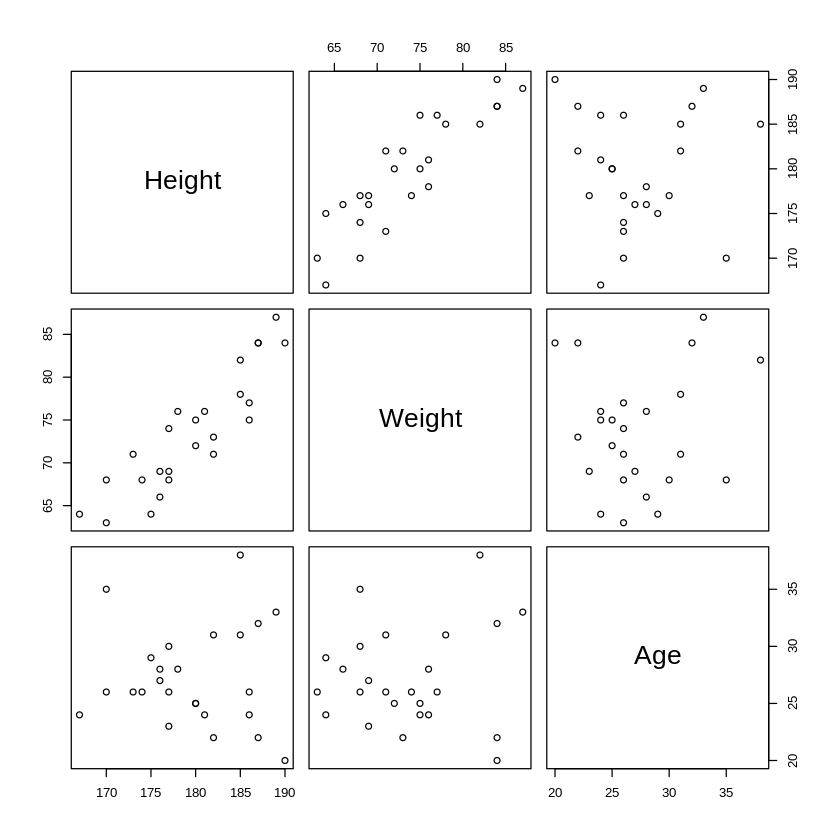

In [3]:
# 男子フル代表の散布図の表示
plot(Men[,2:4])
# 男子フル代表の相関係数の計算
cor(Men[,2:4])

ここで2種類の情報が得られた．
1番目を相関係数行列（相関係数が行列状に並べられている）といい，2番目を散布図行列（散布図が行列状に並べられている）という．

この出力の解釈を進める前に，今後も「第2列から第4列を参照」という意味の[,2:4]を目にしなくて済むように，第2列から第4列の数値のみをもつ変数を新たに作成しておこう．


,Height,Weight,Age
Height,1.000000000,0.8878352,0.006762521
Weight,0.887835228,1.0000000,0.106902206
Age,0.006762521,0.1069022,1.000000000


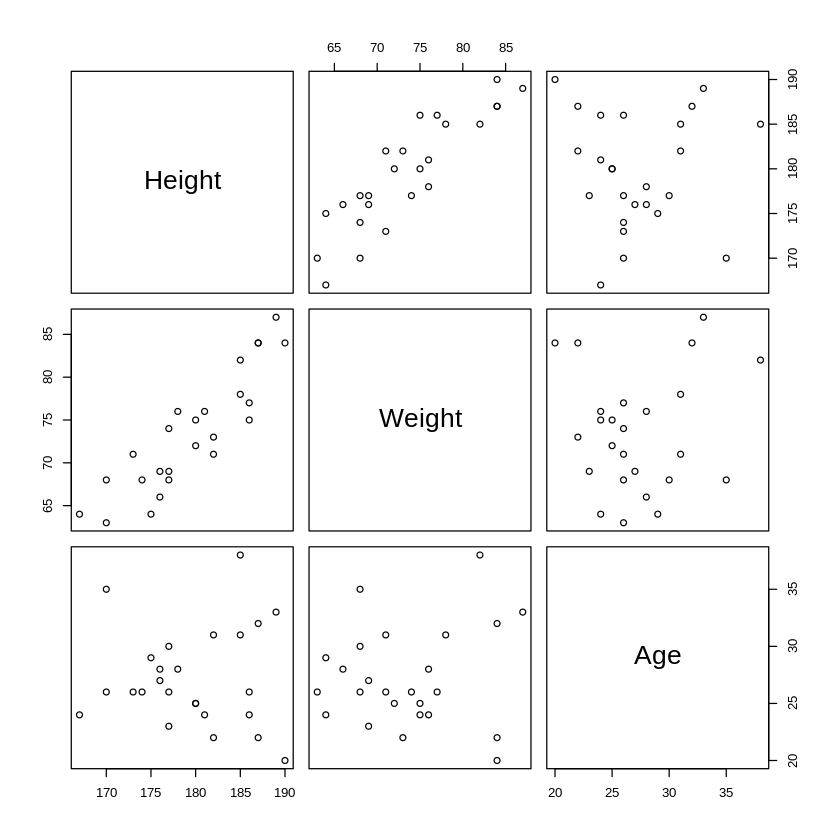

In [4]:
# 数値情報だけのデータを新たに定義する
Men1 <- Men[,2:4]
# 男子代表の散布図の表示
plot(Men1)
# 男子代表の相関係数の計算
cor(Men1)

散布図は2変量の関係性を図示している．
HeightとWeightの組み合わせでは点が右上がりに並ぶ分布，つまり正の相関があるが，Ageとの組み合わせでは右上がりなどの傾向は見られない．

こうした印象を感覚的なだけでなく数値的に見たい．
それを与えるのが相関係数である．
HeightとWeightの組み合わせで相関係数は0.888と正の値かつ1に近く，Ageとの組み合わせではそれぞれ0.007と0.107であり，0に近い値になっていることがわかる．

問：男子五輪代表と女子代表ではどうなっているか確かめよ．

## 回帰直線

上で見た身長と体重の相関関係をもう少し詳しく観察してみる．
まずは散布図行列とせず，この2変量のみで散布図を描いてみる．

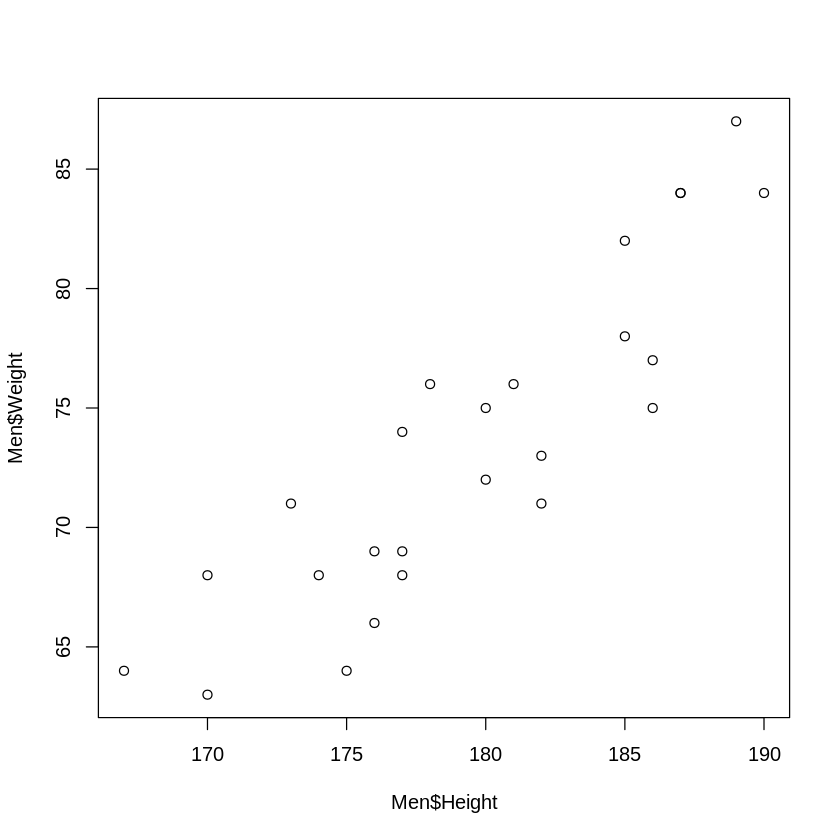

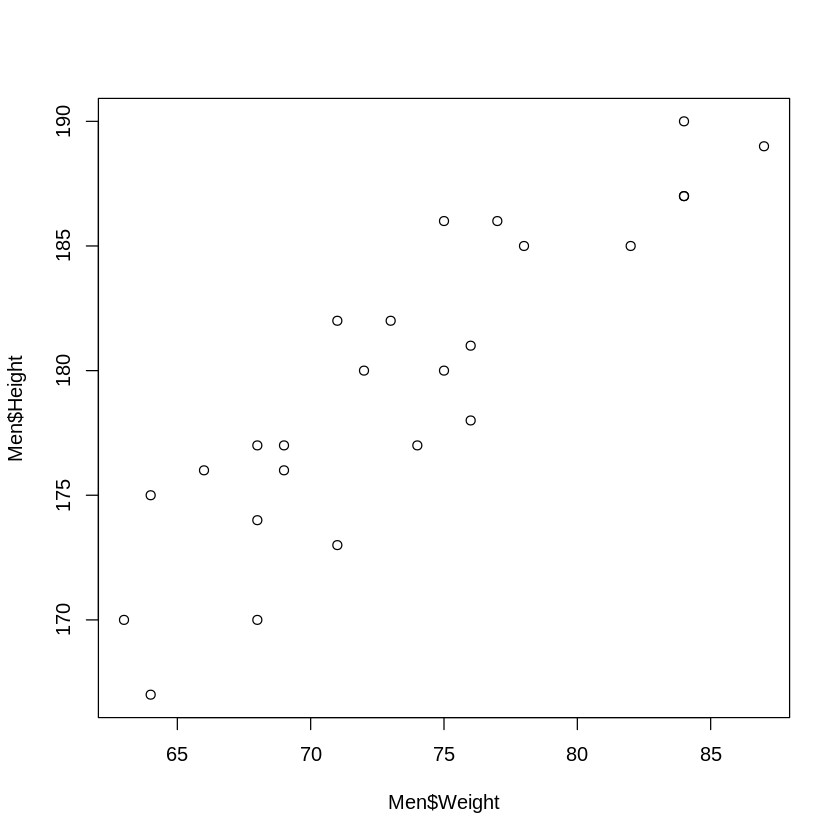

In [5]:
# 身長を横軸にとる
plot(Men$Height,Men$Weight)
# 体重を横軸にとる
plot(Men$Weight,Men$Height)

ここで描いた2つの散布図のうち，どちらが適切であろうか．
単なる数学として考えれば，xからyを見ても，yからxを見ても，いずれもたいした違いはない．
しかしデータ分析の考え方では，横軸（x軸）にある変量を動かすものとし，縦軸（y軸）のある変量は，横軸の値に応じて得られる値だとみなす習慣がある．
このためx軸にとる変数を説明変数，y軸にとる変数を目的変数という呼び方をする．

この例では，身長と体重のいずれを説明変数とした方が解釈しやすいだろうか．
つまり身長の変化により体重の変化が生じているとみなすか，あるいは体重の変化により身長の変化が生じているとみなすかである．
通常は前者，つまり身長が高ければ体重もたいてい大きいとみなすであろう．
そのため，この例では，身長Heightの方が解釈のしやすさから説明変数に選ばれる．

ここで説明変数Heightにもとづく，解釈を補う直線を追加する．


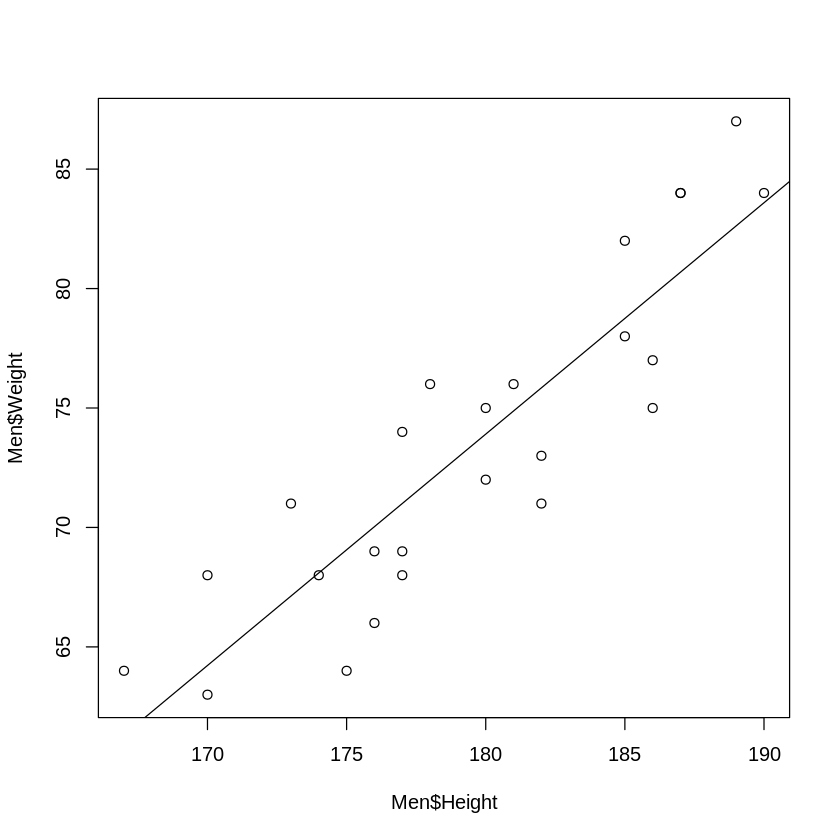

In [6]:
# 身長を横軸にとる
plot(Men$Height,Men$Weight)
# 回帰直線の追加
# lm関数で回帰直線を計算
# 一時的に変数AddLineにその結果を保存する
AddLine <- lm( Men$Weight ~ Men$Height )
# abline関数は直線を散布図に書き加える
abline(AddLine)

直線は関数lmにより計算した．
関数名lmは線形モデル（linear model）に由来する．
いきなりグラフを描かせる例をあげたが，
少し戻って，
この関数による計算結果を確認しておこう．
Rでは「モデルを扱う」ときに記号「〜」を使う約束である．

In [7]:
# lm関数で回帰直線を計算
lm( Men$Weight ~ Men$Height )


Call:
lm(formula = Men$Weight ~ Men$Height)

Coefficients:
(Intercept)   Men$Height  
  -100.4343       0.9686  


直線には傾きと切片の2つの係数があることを知っている．
この出力において，Interceptは切片を表すことばである．
つまり式 $y=-100.4+0.9686x$ が散布図に重ね書きされた直線の式である．

## 相関係数なのど数式の確認

ここで相関係数などの計算式を確認しておこう．
サイズの等しい2変量 $(x_1,y_1),\dots,(x_n,y_n)$ が与えられたとすれば，

統計学では，シグマ記号Σによる合計範囲が共通のことが多い（ここでは1からnまで）こともあり，添字の範囲は省略して表すことが多い．
たとえば平均値 $\bar{x}$ の式（左辺）を右辺のように表すのである．
$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i = \frac{1}{n} \sum x_i
$$
相関係数Rは次式の通りである．
$$
R = \frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum (x_i-\bar{x})^2}\sqrt{\sum (y_i-\bar{y})^2}}
$$
ここで $\bar{x}$，$\bar{y}$ はそれぞれの平均値，
すなわち
$$
\bar{x} = \frac{1}{n} \sum x_i,\quad
\bar{y} = \frac{1}{n} \sum y_i
$$
である．

Rの式の分子は，標本サイズで割れば共分散（Rの関数はcovの(n-1)/n倍）の式である．
つまり
$$
共分散 = \frac{1}{n}\sum (x_i-\bar{x})(y_i-\bar{y})
$$
である．

Rの式の分母はそれぞれxとyの分散（Rの関数varの(n-1)/n倍）の平方根（標準偏差）である．
Rの関数では分散も共分散もnではなく，n-1で割った値であるが，
分母分子で打ち消し合うので，nで割っても，n-1で割っても違いはない．

以下の計算例は以上の関係を確かめている．

In [8]:
# x,yにMen$Height，Men$Weightを設定しておく
x <- Men$Height
y <- Men$Weight
# covは共分散関数，corは相関係数，sdは標準偏差
cor(x,y)
cov(x,y)/sd(x)/sd(y)

[1] 0.8878352

[1] 0.8878352

回帰直線の式 $y=a+bx$ は
$$
b = \frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sum (x_i-\bar{x})^2},\quad a=\bar{y}-b\bar{x}
$$
である．
だから関数lmを使わなくても，Rの関数（共分散cov，分散var）を用いて，次のように計算できる．

In [10]:
# 回帰直線の式
lm(y~x)
# 計算式, meanは平均値を計算
b <- cov(x,y)/var(x)
# 切片aの値
mean(y)-b*mean(x)
# 傾きbの表示
b


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
  -100.4343       0.9686  


[1] -100.4343

[1] 0.9685654

分散は標準偏差の自乗だから，相関係数Rと回帰直線の傾きとの関係式（ここではRの分散関数varおよび標準偏差関数sdを使って総和記号を用いた数式表示を省略した）
$$
R \times \frac{sd(x) sd(y)}{var(x)} =
R \times \frac{sd(y)}{sd(x)} = b
$$
のような関係も確かめられる．
計算で確かめよう．

In [12]:
# bは上で計算済み
# 上の式の左辺
cor(x,y)*sd(x)*sd(y)/var(x)
# 上の式の右辺
cor(x,y)*sd(y)/sd(x)
# 傾きbの値
b

[1] 0.9685654

[1] 0.9685654

[1] 0.9685654

一つ注意しておく．
回帰直線の傾きの式を見ればわかるように，説明変数と目的変数とを入れ替えれば，傾きの値は異なってしまう．
式の分母は説明変数の分散だからである．
直線の式$y=a+bx$をxについて数学的に解けば，その傾きは，もとの直線の傾きの逆数になるはずである．
しかしデータ分析で与える傾きはそうはならないことを計算で確かめよう．

In [13]:
lm(y~x)
lm(x~y)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
  -100.4343       0.9686  



Call:
lm(formula = x ~ y)

Coefficients:
(Intercept)            y  
   119.7669       0.8138  


この例では，いずれの傾きも1より小さく，これらの積が1にならないことは明らかであろう．

問：男子五輪代表および女子代表の場合に，ここまで計算してきたことを確かめよ．